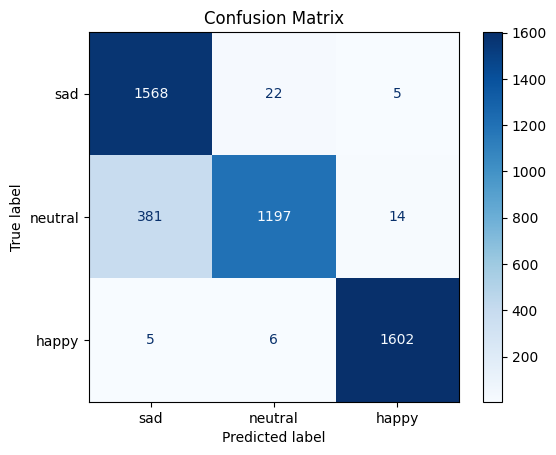

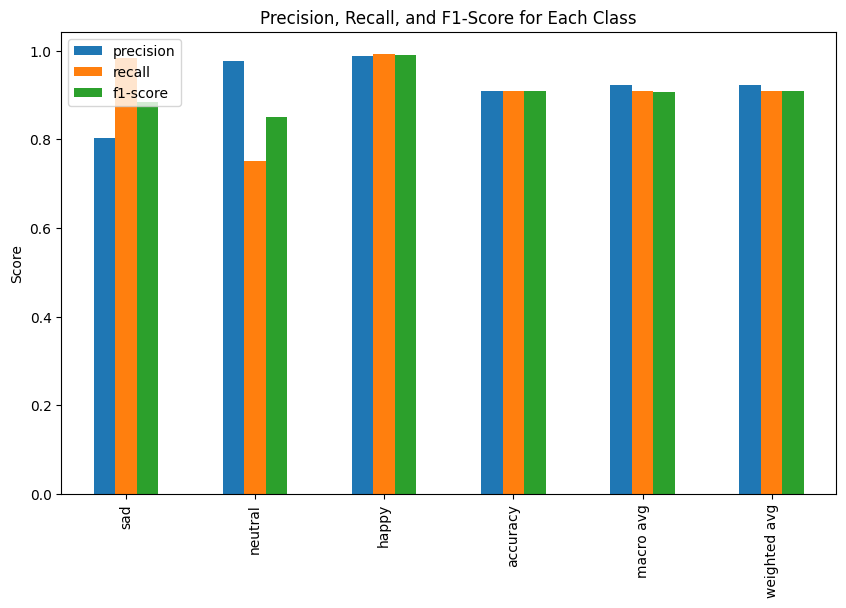

In [1]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import pandas as pd

# Load saved data
y_test, y_pred = joblib.load('test_predictions1.pkl')
classes = ["sad", "neutral", "happy"]

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Generate Classification Report as a DataFrame and Plot
report = classification_report(y_test, y_pred, target_names=classes, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, and F1-Score for Each Class")
plt.ylabel("Score")
plt.show()


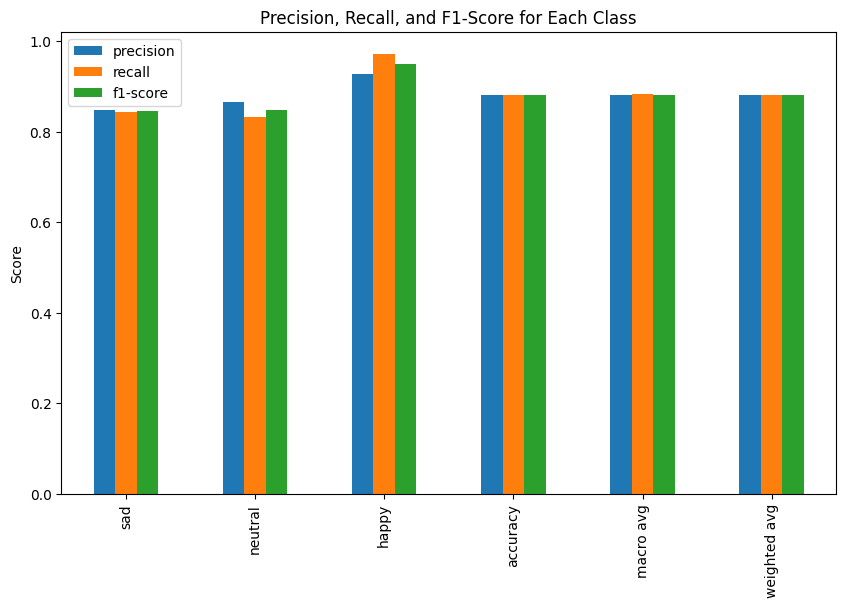

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load y_test and y_pred
y_test, y_pred = joblib.load('test_predictions.pkl')
classes = ["sad", "neutral", "happy"]

# Generate classification report and plot
report = classification_report(y_test, y_pred, target_names=classes, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, and F1-Score for Each Class")
plt.ylabel("Score")
plt.show()


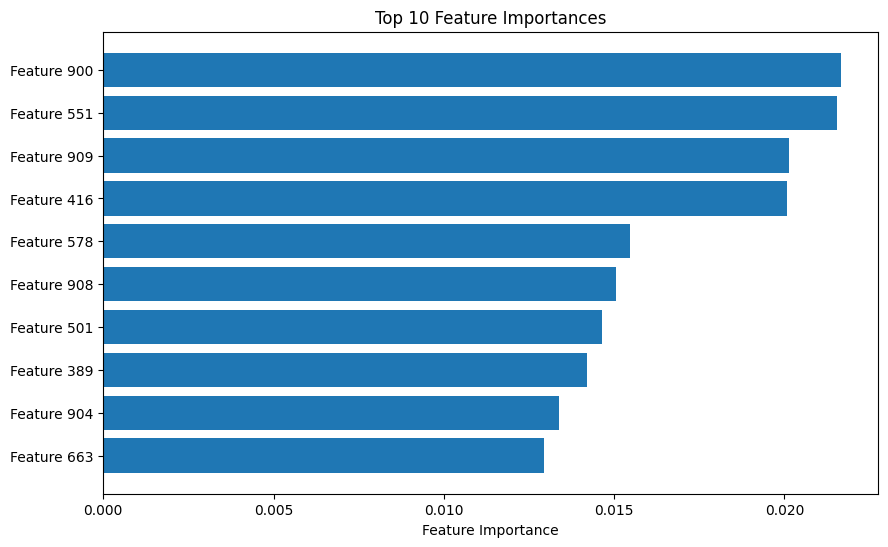

In [6]:
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Load the model
model = joblib.load('rf.pkl')

# Ensure the model is a RandomForestClassifier
if hasattr(model, "feature_importances_"):
    # Get feature importances
    importances = model.feature_importances_

    # Get indices of the top 10 features
    indices = np.argsort(importances)[-10:]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(indices)), importances[indices], align="center")
    plt.yticks(range(len(indices)), [f"Feature {i}" for i in indices])
    plt.xlabel("Feature Importance")
    plt.title("Top 10 Feature Importances")
    plt.show()
else:
    print("The loaded model does not have feature importances.")


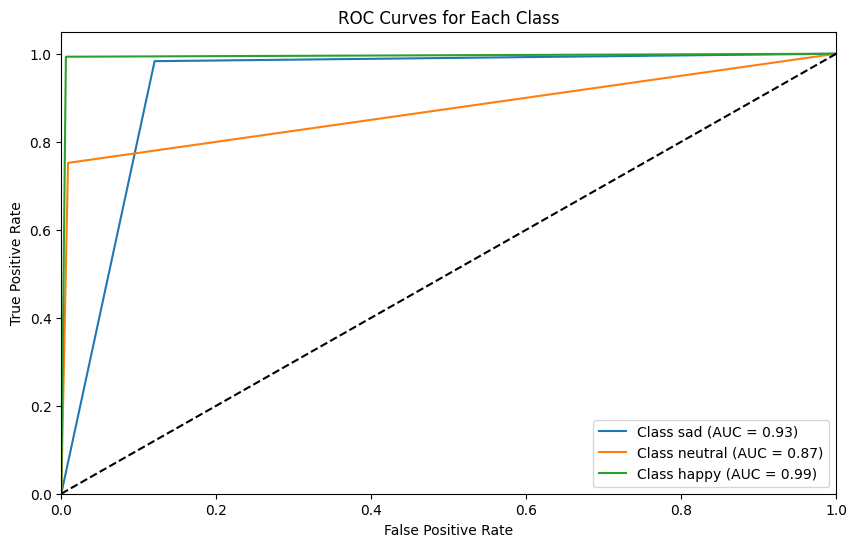

In [7]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Binarize y_test and y_pred for ROC analysis (assuming 3 classes)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Each Class")
plt.legend(loc="lower right")
plt.show()


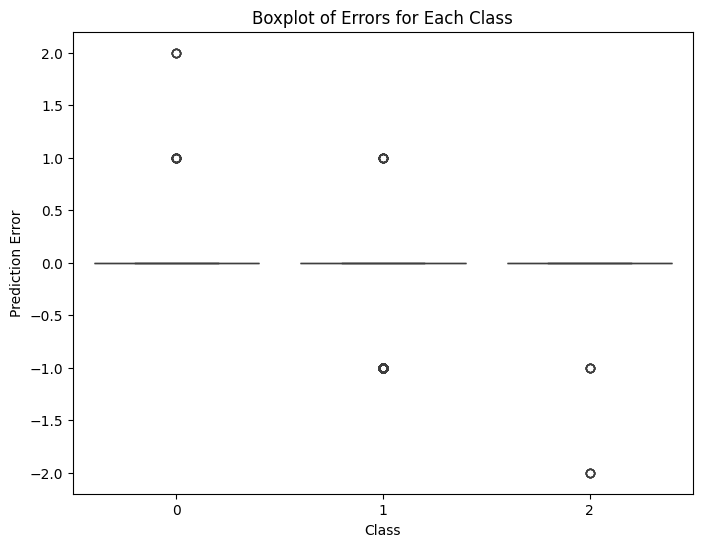

In [8]:
import seaborn as sns 
# 7. **Boxplot of Errors**
errors = y_pred - y_test

plt.figure(figsize=(8, 6))
sns.boxplot(x=y_test, y=errors)
plt.title('Boxplot of Errors for Each Class')
plt.xlabel('Class')
plt.ylabel('Prediction Error')
plt.show()
